In [1]:
import json
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]


# Read JSON file
with open('SN2011fe.json', 'r') as file:
    data = json.load(file)

    
sn = data['SN2011fe']

sn.keys()

dict_keys(['schema', 'name', 'sources', 'alias', 'claimedtype', 'comovingdist', 'dec', 'discoverdate', 'discoverer', 'ebv', 'host', 'hostdec', 'hostoffsetang', 'hostoffsetdist', 'hostra', 'hostvelocity', 'lumdist', 'maxabsmag', 'maxappmag', 'maxband', 'maxdate', 'maxvisualabsmag', 'maxvisualappmag', 'maxvisualband', 'maxvisualdate', 'ra', 'redshift', 'velocity', 'photometry', 'spectra'])

In [9]:
sn['schema']

'https://github.com/astrocatalogs/supernovae/blob/d3ef5fc/SCHEMA.md'

In [2]:
sn['dec']

[{'value': '+54:16:25.22', 'u_value': 'degrees', 'source': '24,43'},
 {'value': '+54:16:25.32', 'u_value': 'degrees', 'source': '13'},
 {'value': '+54:16:25.4', 'u_value': 'degrees', 'source': '45'},
 {'value': '+54:16:25.3', 'u_value': 'degrees', 'source': '32,37'}]

In [3]:
sn['sources']

[{'name': '2020MNRAS.492.4325S',
  'bibcode': '2020MNRAS.492.4325S',
  'reference': 'Stahl et al. (2020)',
  'alias': '1'},
 {'name': '2019MNRAS.490.3882S',
  'bibcode': '2019MNRAS.490.3882S',
  'reference': 'Stahl et al. (2019)',
  'alias': '2'},
 {'name': '2017MNRAS.466.3442J',
  'bibcode': '2017MNRAS.466.3442J',
  'reference': 'Johansson et al. (2017)',
  'alias': '3'},
 {'name': '2017MNRAS.472.3437G',
  'bibcode': '2017MNRAS.472.3437G',
  'reference': 'Graham et al. (2017)',
  'alias': '4'},
 {'name': '2017arXiv170302402W',
  'bibcode': '2017arXiv170302402W',
  'reference': 'Weyant et al. (2017)',
  'alias': '5'},
 {'name': '2016A&A...594A..13P',
  'bibcode': '2016A&A...594A..13P',
  'reference': 'Planck Collaboration et al. (2016)',
  'alias': '6'},
 {'name': '2016PASP..128...961',
  'bibcode': '2016PASP..128...961',
  'alias': '7'},
 {'name': '2015ApJS..220....9F',
  'bibcode': '2015ApJS..220....9F',
  'reference': 'Friedman et al. (2015)',
  'alias': '8'},
 {'name': '2015MNRAS.4

In [4]:
# Print metadata (optional)
#for key, value in sn.items():
#    print(f"{key}: {value}")



In [5]:
# creating the arrays that will be used for plotting

photometry = sn['photometry']

photometry_by_band = {}
for entry in photometry:
    try:
        band = entry['band']
        magnitude = entry['magnitude']
        if band not in photometry_by_band:
            photometry_by_band[band] = {'times': [], 'magnitudes': []}
        photometry_by_band[band]['times'].append(float(entry['time']))
        photometry_by_band[band]['magnitudes'].append(float(entry['magnitude']))

    except:
        print("skipping")
    


skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping
skipping


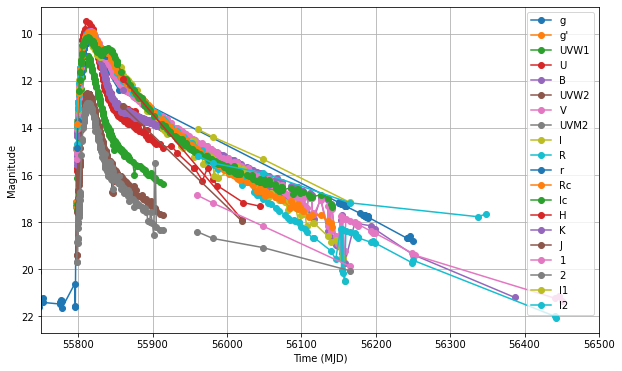

In [6]:
# Plot photometry for each band and telescope
for band, data in photometry_by_band.items():
    plt.plot(data['times'], data['magnitudes'], marker='o', linestyle='-', label=f'{band}')
    plt.xlabel('Time (MJD)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis since brighter means lower magnitude
plt.xlim(55750,56500)
plt.show()

In [7]:
spectra = sn['spectra']
#spectra

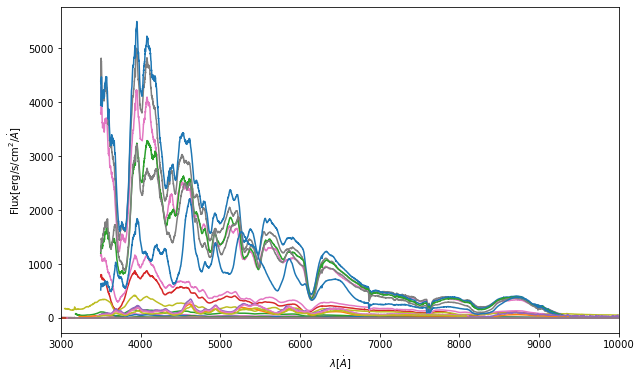

In [8]:
spectra_by_time = {}
for spectrum in spectra:
    try:
        time = spectrum['time']
        wavelengths = [float(entry[0]) for entry in spectrum['data']]
        flux = [float(entry[1]) for entry in spectrum['data']]
#        magnitude = entry['magnitude']
#        if band not in photometry_by_band:
#            photometry_by_band[band] = {'times': [], 'magnitudes': []}
#        photometry_by_band[band]['times'].append(float(entry['time']))
#        photometry_by_band[band]['magnitudes'].append(float(entry['magnitude']))

        plt.plot(wavelengths,flux)
        plt.xlim(3000,10000)
        plt.xlabel('$\lambda[\dot{A}]$')
        plt.ylabel('Flux[erg/s/cm$^2/\dot{A}$]')
#
    except:
        print("skipping")
        
        
